In [1]:
import ROOT
import os
import numpy as np
import re
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.style.use('science')
plt.rcParams.update({
    "text.usetex": True
})

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-94a79gsb because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
version="MC"
chain = ROOT.TChain("dihadron")
chain.Add("/volatile/clas12/users/gmat/clas12analysis.sidis.data/clas12_dihadrons/projects/ana_v2/data/piplus_pi0/MC_RGA_3051_0.root")

1

In [7]:
def FOM(chain,p):
    h = ROOT.TH1F("h","",200,0,0.6)
    chain.Draw("M2>>h",f"p_21>{p}&&p_22>{p}&&xF1>0&&xF2>0&&P1>1.25","goff",1000000)
    h.Scale(1/h.Integral())
    tf1 = ROOT.TF1("tf1", "[0]*TMath::Gaus(x,[1],[2]) + [3] + [4]*x + [5]*x*x + [6]*x*x*x + [7]*x*x*x*x",0.07,0.4)
    tf1.SetParLimits(1,0.129,0.138)
    tf1.SetParLimits(2,0.0001,0.1)
    h.Fit(tf1,"RQ")
    
    tf1_signal = ROOT.TF1("tf1_signal", f"{tf1.GetParameter(0)}*TMath::Gaus(x,{tf1.GetParameter(1)},{tf1.GetParameter(2)})",0.07,0.4)
    tf1_bkg = ROOT.TF1("tf1_bkg", f"{tf1.GetParameter(3)} + {tf1.GetParameter(4)}*x + {tf1.GetParameter(5)}*x*x + {tf1.GetParameter(6)}*x*x*x + {tf1.GetParameter(7)}*x*x*x*x",0.07,0.4)

    xmin = tf1.GetParameter(1)-3*tf1.GetParameter(2)
    xmax = tf1.GetParameter(1)+3*tf1.GetParameter(2)
    
    sig = tf1_signal.Integral(xmin,xmax)
    bg  = tf1_bkg.Integral(xmin,xmax)
    
    return sig,bg,sig/np.sqrt(sig+bg)

def SIGMA(chain,p):
    h = ROOT.TH1F("h","",200,0,0.6)
    chain.Draw("M2>>h",f"p_21>{p}&&p_22>{p}&&xF1>0&&xF2>0&&P1>1.25","goff",1000000)
    h.Scale(1/h.Integral())
    tf1 = ROOT.TF1("tf1", "[0]*TMath::Gaus(x,[1],[2]) + [3] + [4]*x + [5]*x*x + [6]*x*x*x + [7]*x*x*x*x",0.07,0.4)
    tf1.SetParLimits(1,0.129,0.138)
    tf1.SetParLimits(2,0.0001,0.1)
    h.Fit(tf1,"RQ")
    
    return tf1.GetParameter(2), tf1.GetParError(2)

def histo(chain,p):
    h = ROOT.TH1F("h","",200,0,0.6)
    chain.Draw("M2>>h",f"p_21>{p}&&p_22>{p}&&xF1>0&&xF2>0&&P1>1.25","goff",1000000)
    h.Scale(1/h.Integral())
    return [h.GetBinCenter (i+1) for i in range(200)],[h.GetBinContent(i+1) for i in range(200)]

def NsigNbkg(chain,p):
    h = ROOT.TH1F("h","",100,0.07,0.3)
    chain.Draw("M2>>h",f"p_21>{p}&&p_22>{p}&&xF1>0&&xF2>0&&P1>1.25","goff",1000000)
    tf1 = ROOT.TF1("tf1", "[0]*TMath::Gaus(x,[1],[2]) + [3] + [4]*x + [5]*x*x + [6]*x*x*x + [7]*x*x*x*x",0.07,0.3)
    tf1.SetParLimits(1,0.133,0.136)
    tf1.SetParLimits(2,0.001,0.2)
    h.Fit(tf1,"RQ")
    
    tf1_signal = ROOT.TF1("tf1_signal", f"{tf1.GetParameter(0)}*TMath::Gaus(x,{tf1.GetParameter(1)},{tf1.GetParameter(2)})",0.07,0.3)
    tf1_bkg = ROOT.TF1("tf1_bkg", f"{tf1.GetParameter(3)} + {tf1.GetParameter(4)}*x + {tf1.GetParameter(5)}*x*x + {tf1.GetParameter(6)}*x*x*x + {tf1.GetParameter(7)}*x*x*x*x",0.07,0.3)

    xmin = tf1.GetParameter(1)-2*tf1.GetParameter(2)
    xmax = tf1.GetParameter(1)+2*tf1.GetParameter(2)
    
    sig = tf1_signal.Integral(xmin,xmax)
    bg  = tf1_bkg.Integral(xmin,xmax)
    
    return sig,bg

# Figure of Merit

In [12]:
x = np.linspace(0.9,0.99,100)
sig = []; bg=[]; y=[];
for X in x:
    _ = FOM(chain,X)
    sig.append(_[0])
    bg.append(_[1])
    y.append(_[2])

Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter valu

ValueError: x and y must have same first dimension, but have shapes (100,) and (97,)

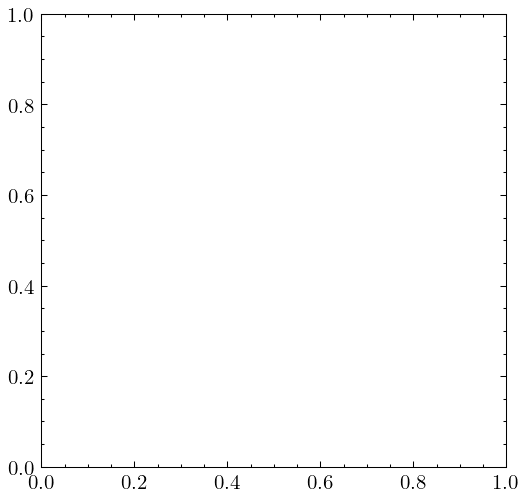

In [11]:
fig,axs=plt.subplots(1,1,dpi=150,figsize=(4,4))
axs.plot(x,y,"ko",markersize=1)
axs.set_ylabel(r"FOM=$N_{sig}/\sqrt{N_{tot}}$",fontsize=15)
axs.set_xlabel(r"p threshold")
axs.plot(0.9,y[np.argmin(np.abs(x-0.9))],'r*',markersize=10)
axs.vlines(0.9,0,y[np.argmin(np.abs(x-0.9))],linestyle='dotted',color='r')
axs.set_ylim(0,0.06)
axs.text(0.25,0.21,r"e+p$\rightarrow$e$\pi^{+}\pi^{0}$X",transform=axs.transAxes)
axs.text(0.25,0.16,r"CLAS12 RG-A F18 inbending",transform=axs.transAxes)
X,Y = histo(chain,0.9)

ins=axs.inset_axes([0.1,0.5,0.4,0.4])
ins.hist(X,len(X),weights=Y,color="k",histtype="step")
ins.set_xlabel(r"$M_{\gamma\gamma}$")
ins.yaxis.set_ticklabels([])
ins.set_xticks(np.linspace(0,0.6,7))
ins.tick_params(axis='x', labelsize=5)
ins.text(0.4, 0.75, 'p=0.9, \nFOM = {}'.format(np.round(y[np.argmin(np.abs(x-0.9))],4)), fontsize = 6, color="red", transform=ins.transAxes)


plt.show()

# Sigma vs. p threshold

In [6]:
x = np.linspace(0,0.98,50)
y=[]
yerr=[]
for X in x:
    Y,YERR = SIGMA(chain,X)
    y.append(Y)
    yerr.append(YERR)

Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter valu

Text(0.5, 0, 'p threshold')

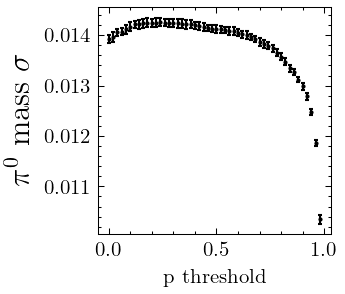

In [7]:
fig,axs=plt.subplots(1,1,dpi=150,figsize=(2,2))
axs.errorbar(x,y,yerr=yerr,fmt="ko",capsize=1,markersize=1)
axs.set_ylabel(r"$\pi^{0}$ mass $\sigma$",fontsize=15)
#axs.set_ylim(0,0.015)
axs.set_xlabel(r"p threshold")

# Nsig and Nbkg vs p threshold

In [109]:
x = np.linspace(0,0.98,40)
sig = []; bg=[];
for ix,X in enumerate(x):
    print(ix,"of",len(x))
    _ = NsigNbkg(chain,X)
    sig.append(_[0])
    bg.append(_[1])

0 of 40
1 of 40
2 of 40
3 of 40
4 of 40
5 of 40
6 of 40
7 of 40
8 of 40
9 of 40
10 of 40
11 of 40
12 of 40
13 of 40
14 of 40
15 of 40
16 of 40
17 of 40
18 of 40
19 of 40
20 of 40
21 of 40
22 of 40
23 of 40
24 of 40
25 of 40
26 of 40
27 of 40
28 of 40
29 of 40
30 of 40
31 of 40
32 of 40
33 of 40
34 of 40
35 of 40
36 of 40
37 of 40
38 of 40
39 of 40


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter valu

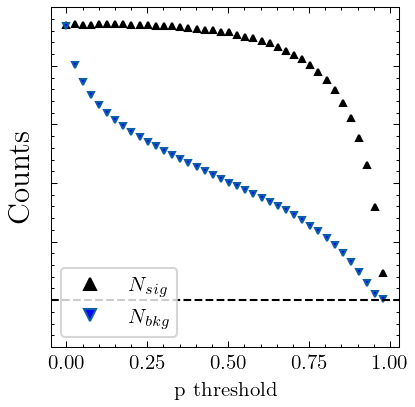

In [110]:
fig,axs=plt.subplots(1,1,dpi=150,figsize=(3,3))
axs.plot(x,sig,"k^",markersize=3,label=r"$N_{sig}$")
axs.plot(x,bg,"v",markersize=3,markerfacecolor="blue",label=r"$N_{bkg}$")
axs.set_ylabel(r"Counts",fontsize=15)
axs.set_ylim(-40,250)
axs.legend(frameon=True,markerscale=2)
axs.set_xlabel(r"p threshold")
axs.tick_params(labelleft=False)
axs.axhline(y=0,linestyle="--",color="k")

In [31]:
sig

[0.0003247927823068094,
 0.0004131208408946726,
 0.00047204226575652225,
 0.0005111910732997086,
 0.0005418725439516744,
 0.0005675249475268893,
 0.0005890520493491238,
 0.0006090730087636597,
 0.0006261129011102776,
 0.0006416270376010784,
 0.0006565741252896212,
 0.0006702071338668576,
 0.0006824494587863747,
 0.0006946453125659124,
 0.0007042394826447083,
 0.0007152017117357454,
 0.0007251387615105195,
 0.0007339628041350061,
 0.0007431019987788512,
 0.0007526966885690145,
 0.0007605423278646665,
 0.0007701248282779092,
 0.0007790918882110017,
 0.0007873521908322271,
 0.0007954244633647449,
 0.0008025711161673962,
 0.0008098315245888771,
 0.0008181971074563699,
 0.000824847837843095,
 0.0008316967228977781,
 0.0008385691158347929,
 0.00084511278159003,
 0.0008519659588394141,
 0.0008583598521062217,
 0.0008652691997319808,
 0.0008718264165308081,
 0.0008790220961697611,
 0.0008844492762680976,
 0.0008896957201247201,
 0.0008962708367115761,
 0.0009020355942258415,
 0.000907404895012